# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_1 Repeat.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,140.375575,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
0,576.0,555.0,710.0,803.0,852.0,958.0,961.0,1058.0,1143.0,1160.0,...,1420.0,1389.0,1418.0,1449.0,1413.0,1399.0,1426.0,1441.0,1551.0,1443.0
1,452.0,529.0,699.0,695.0,909.0,770.0,844.0,952.0,965.0,1022.0,...,1410.0,1402.0,1326.0,1387.0,1424.0,1429.0,1435.0,1373.0,1412.0,1456.0
2,451.0,565.0,695.0,663.0,786.0,754.0,789.0,927.0,954.0,980.0,...,1282.0,1402.0,1430.0,1420.0,1438.0,1434.0,1442.0,1438.0,1553.0,1428.0
3,458.0,557.0,659.0,652.0,808.0,760.0,810.0,875.0,978.0,941.0,...,1433.0,1395.0,1520.0,1432.0,1397.0,1446.0,1453.0,1403.0,1472.0,1492.0
4,425.0,602.0,608.0,707.0,813.0,737.0,910.0,899.0,968.0,903.0,...,1502.0,1407.0,1446.0,1522.0,1518.0,1548.0,1538.0,1483.0,1462.0,1414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,349.0,398.0,515.0,495.0,611.0,598.0,578.0,703.0,738.0,711.0,...,704.0,674.0,781.0,683.0,790.0,774.0,726.0,688.0,761.0,745.0
374,344.0,378.0,517.0,523.0,623.0,525.0,643.0,624.0,672.0,657.0,...,692.0,652.0,684.0,736.0,677.0,688.0,748.0,673.0,713.0,648.0
375,348.0,338.0,430.0,502.0,614.0,561.0,614.0,622.0,652.0,632.0,...,624.0,667.0,701.0,686.0,681.0,765.0,721.0,673.0,731.0,736.0
376,341.0,421.0,544.0,462.0,545.0,541.0,570.0,667.0,734.0,701.0,...,685.0,690.0,718.0,593.0,701.0,673.0,740.0,751.0,732.0,699.0


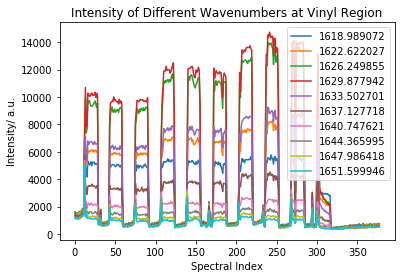

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region')
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.559307'] --> When using loc.
# df.columns.get_loc('1629.124559') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label 1629.559307. Use relevant parameter for iloc and loc respectively.

# Filter Relevant Spectra

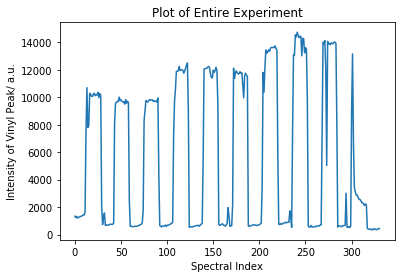

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:330,'1629.877942'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment')
plt.show()

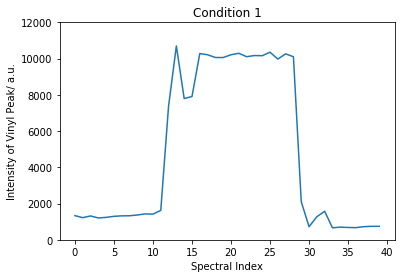

In [6]:
# Condition 
condition1 = df.iloc[:40,:] 
condition1.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1')
plt.ylim(0,12000) # Zoom in to relevant spectral range.
plt.show()

In [7]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[20:24, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =1)
condition1_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
20,1,8101.0,9226.0,9400.0,9189.0,8660.0,7867.0,7065.0,6705.0,6234.0,...,278.0,246.0,292.0,254.0,269.0,282.0,233.0,285.0,265.0,198.0
21,1,8381.0,9227.0,9647.0,9176.0,8810.0,7525.0,6947.0,6688.0,6157.0,...,301.0,206.0,269.0,251.0,282.0,235.0,336.0,265.0,331.0,186.0
22,1,8269.0,9511.0,9552.0,9245.0,8676.0,7626.0,7193.0,6748.0,6254.0,...,241.0,276.0,259.0,192.0,309.0,237.0,266.0,233.0,328.0,227.0
23,1,8228.0,9425.0,9458.0,9156.0,8589.0,7834.0,7342.0,6552.0,6243.0,...,281.0,223.0,220.0,153.0,228.0,203.0,283.0,262.0,244.0,215.0
24,1,8013.0,9236.0,9925.0,9190.0,8521.0,7757.0,7228.0,6641.0,6151.0,...,275.0,238.0,202.0,270.0,223.0,258.0,243.0,301.0,299.0,230.0


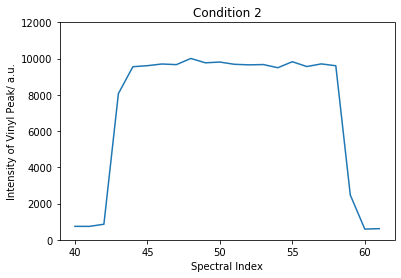

In [8]:
# condition 
condition2 = df.iloc[40:62,:] 
condition2.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2')
plt.ylim(0,12000) # Zoom in to relevant spectral range.
plt.show()

In [9]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[50:54, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =2)
condition2_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
50,2,8161.0,9175.0,9362.0,9160.0,8360.0,7561.0,6926.0,6350.0,6102.0,...,179.0,238.0,203.0,204.0,223.0,212.0,195.0,220.0,227.0,176.0
51,2,8052.0,9302.0,9383.0,9153.0,8492.0,7587.0,6993.0,6609.0,5897.0,...,206.0,211.0,211.0,219.0,233.0,246.0,260.0,234.0,240.0,186.0
52,2,8131.0,9076.0,9427.0,9150.0,8291.0,7610.0,6951.0,6339.0,6070.0,...,212.0,221.0,228.0,178.0,150.0,187.0,202.0,209.0,239.0,184.0
53,2,8345.0,9196.0,9416.0,9064.0,8418.0,7440.0,6968.0,6442.0,6000.0,...,258.0,170.0,184.0,184.0,178.0,243.0,241.0,185.0,257.0,191.0
54,2,8196.0,9263.0,9555.0,9153.0,8528.0,7620.0,7040.0,6222.0,6087.0,...,183.0,226.0,169.0,171.0,214.0,232.0,236.0,192.0,211.0,187.0


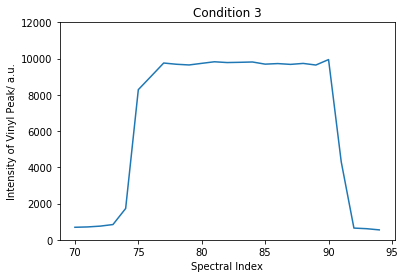

In [10]:
# Condition
condition3 = df.iloc[70:95,:] 
condition3.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3')
plt.ylim(0,12000) # Zoom in to relevant spectral range.
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[82:86, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =3)
condition3_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
82,3,7940.0,9352.0,9508.0,9128.0,8435.0,7422.0,7014.0,6527.0,6000.0,...,160.0,145.0,176.0,95.0,201.0,145.0,164.0,142.0,180.0,211.0
83,3,8109.0,9054.0,9347.0,8938.0,8419.0,7685.0,6849.0,6418.0,5949.0,...,261.0,178.0,217.0,197.0,161.0,183.0,195.0,161.0,187.0,163.0
84,3,8141.0,9167.0,9347.0,9017.0,8266.0,7577.0,6867.0,6258.0,5966.0,...,193.0,150.0,182.0,153.0,198.0,151.0,232.0,167.0,228.0,162.0
85,3,7905.0,9083.0,9368.0,8931.0,8421.0,7627.0,6991.0,6389.0,5909.0,...,183.0,213.0,165.0,135.0,146.0,219.0,238.0,165.0,199.0,174.0
86,3,8173.0,9323.0,9475.0,8975.0,8360.0,7446.0,6917.0,6308.0,5929.0,...,216.0,143.0,167.0,171.0,238.0,214.0,211.0,203.0,252.0,141.0


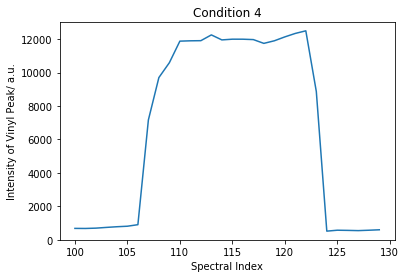

In [12]:
# Condition
condition4 = df.iloc[100:130,:] 
condition4.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [13]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[115:119, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =4)
condition4_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
115,4,8491.0,9387.0,9683.0,9277.0,8758.0,8059.0,7093.0,6601.0,6186.0,...,165.0,210.0,122.0,218.0,164.0,202.0,224.0,212.0,161.0,216.0
116,4,8306.0,9549.0,9729.0,9198.0,8562.0,7869.0,7127.0,6859.0,6264.0,...,198.0,147.0,196.0,147.0,186.0,165.0,236.0,172.0,197.0,139.0
117,4,8362.0,9404.0,9733.0,9326.0,8698.0,7758.0,7234.0,6570.0,6171.0,...,201.0,171.0,168.0,151.0,152.0,210.0,125.0,175.0,160.0,138.0
118,4,8356.0,9658.0,9907.0,9508.0,8708.0,7953.0,7255.0,6595.0,6270.0,...,195.0,165.0,183.0,115.0,165.0,175.0,205.0,212.0,262.0,172.0
119,4,8170.0,9217.0,9774.0,9265.0,8581.0,7931.0,7151.0,6740.0,6139.0,...,228.0,207.0,205.0,191.0,227.0,209.0,262.0,179.0,221.0,176.0


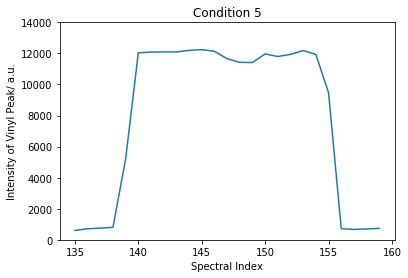

In [14]:
# Condition
condition5 = df.iloc[135:160,:] 
condition5.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5')
plt.ylim(0,14000) # Zoom in to relevant spectral range.
plt.show()

In [15]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[147:151, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =5)
condition5_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
147,5,7722.0,8654.0,8947.0,8759.0,7913.0,7174.0,6647.0,6259.0,5906.0,...,279.0,255.0,254.0,288.0,294.0,265.0,312.0,332.0,303.0,225.0
148,5,7652.0,8483.0,8643.0,8413.0,7714.0,6986.0,6275.0,6034.0,5592.0,...,370.0,386.0,316.0,302.0,379.0,351.0,341.0,300.0,347.0,236.0
149,5,7438.0,8332.0,8743.0,8159.0,7836.0,7005.0,6656.0,6012.0,5611.0,...,350.0,281.0,322.0,251.0,350.0,271.0,316.0,273.0,344.0,295.0
150,5,7822.0,8915.0,9335.0,8844.0,8296.0,7477.0,6812.0,6348.0,5850.0,...,246.0,181.0,244.0,220.0,224.0,167.0,183.0,228.0,233.0,214.0
151,5,7882.0,8897.0,9236.0,8873.0,8171.0,7509.0,6793.0,6403.0,5941.0,...,251.0,225.0,236.0,233.0,266.0,226.0,221.0,226.0,237.0,282.0


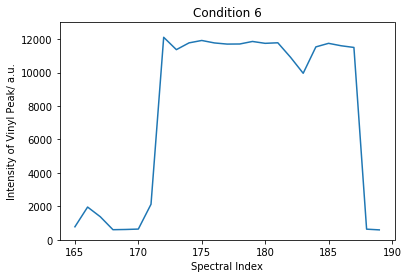

In [16]:
# Condition
condition6 = df.iloc[165:190,:] 
condition6.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[177:181, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =6)
condition6_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
177,6,7669.0,8858.0,8959.0,8490.0,8009.0,7406.0,6779.0,6220.0,5753.0,...,219.0,203.0,210.0,159.0,215.0,238.0,243.0,177.0,242.0,156.0
178,6,7758.0,8578.0,9057.0,8447.0,7970.0,7208.0,6591.0,6172.0,5661.0,...,239.0,214.0,176.0,191.0,242.0,233.0,245.0,229.0,224.0,174.0
179,6,7689.0,8619.0,8861.0,8663.0,7998.0,7320.0,6614.0,6269.0,5632.0,...,182.0,227.0,198.0,188.0,205.0,241.0,210.0,193.0,245.0,201.0
180,6,7859.0,8600.0,8808.0,8672.0,8070.0,7146.0,6576.0,6217.0,5858.0,...,231.0,211.0,179.0,213.0,229.0,230.0,285.0,224.0,235.0,177.0
181,6,7723.0,8635.0,8914.0,8663.0,8218.0,7244.0,6806.0,6206.0,5680.0,...,227.0,222.0,238.0,231.0,241.0,251.0,248.0,252.0,195.0,166.0


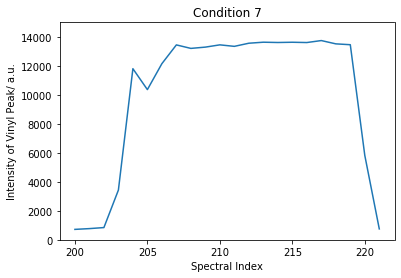

In [18]:
# Condition
condition7 = df.iloc[200:222,:] 
condition7.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7')
plt.ylim(0,15000) # Zoom in to relevant spectral range.
plt.show()

In [19]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[210:214, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =7)
condition7_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
210,7,7465.0,8443.0,8858.0,8662.0,7878.0,7160.0,6616.0,6141.0,5697.0,...,369.0,333.0,331.0,372.0,340.0,348.0,341.0,363.0,341.0,346.0
211,7,7614.0,8435.0,8581.0,8298.0,7827.0,7172.0,6633.0,6136.0,5703.0,...,387.0,319.0,335.0,356.0,317.0,397.0,353.0,336.0,360.0,318.0
212,7,7737.0,8304.0,8785.0,8333.0,7918.0,7182.0,6422.0,6228.0,5850.0,...,413.0,379.0,452.0,296.0,334.0,318.0,387.0,351.0,388.0,291.0
213,7,7427.0,8588.0,8751.0,8440.0,7765.0,7269.0,6530.0,6106.0,5772.0,...,417.0,387.0,318.0,372.0,377.0,433.0,382.0,337.0,335.0,303.0
214,7,7345.0,8406.0,8669.0,8512.0,7857.0,7039.0,6512.0,6205.0,5633.0,...,374.0,372.0,339.0,363.0,283.0,342.0,363.0,348.0,355.0,344.0


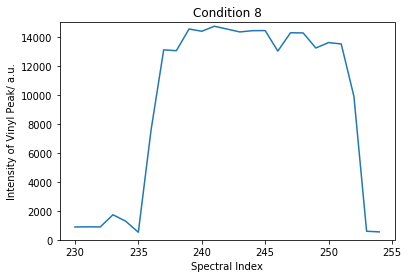

In [20]:
# Condition
condition8 = df.iloc[230:255,:] 
condition8.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8')
plt.ylim(0,15000) # Zoom in to relevant spectral range.
plt.show()

In [21]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[241:245, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =8)
condition8_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
241,8,8039.0,8973.0,9344.0,9078.0,8582.0,7808.0,7242.0,6747.0,6126.0,...,153.0,160.0,181.0,116.0,164.0,178.0,195.0,139.0,162.0,155.0
242,8,8108.0,9276.0,9388.0,9047.0,8568.0,7851.0,7126.0,6412.0,6318.0,...,165.0,140.0,102.0,127.0,151.0,106.0,216.0,124.0,180.0,99.0
243,8,7975.0,9099.0,9529.0,9233.0,8621.0,7815.0,7275.0,6573.0,6042.0,...,170.0,195.0,119.0,141.0,175.0,185.0,165.0,179.0,159.0,192.0
244,8,8170.0,9134.0,9586.0,9166.0,8511.0,7676.0,7146.0,6675.0,6242.0,...,183.0,116.0,193.0,123.0,183.0,139.0,141.0,118.0,157.0,163.0
245,8,8007.0,9201.0,9359.0,9251.0,8555.0,7808.0,7104.0,6393.0,6231.0,...,102.0,147.0,119.0,77.0,177.0,156.0,189.0,152.0,177.0,90.0


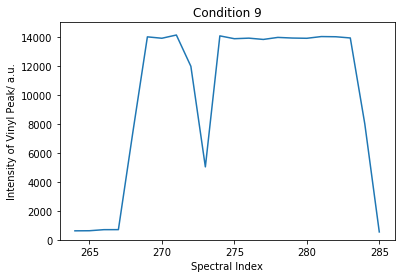

In [22]:
# Condition
condition9 = df.iloc[264:286,:] 
condition9.loc[:,'1629.877942'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9')
plt.ylim(0,15000) # Zoom in to relevant spectral range.
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[275:279, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =9)
condition9_ss

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
275,9,7896.0,8871.0,9421.0,9090.0,8423.0,7572.0,7059.0,6399.0,5983.0,...,156.0,102.0,137.0,60.0,149.0,189.0,173.0,139.0,176.0,111.0
276,9,8003.0,9072.0,9310.0,9148.0,8265.0,7546.0,7030.0,6598.0,6092.0,...,186.0,147.0,134.0,117.0,145.0,164.0,218.0,165.0,173.0,147.0
277,9,7992.0,8980.0,9331.0,8843.0,8357.0,7525.0,7213.0,6581.0,6168.0,...,116.0,148.0,106.0,131.0,173.0,136.0,195.0,146.0,211.0,148.0
278,9,7990.0,9113.0,9447.0,8825.0,8501.0,7592.0,7016.0,6565.0,6000.0,...,156.0,150.0,155.0,90.0,119.0,175.0,187.0,158.0,145.0,135.0
279,9,7950.0,8906.0,9107.0,9113.0,8419.0,7662.0,6919.0,6367.0,6034.0,...,163.0,119.0,163.0,103.0,118.0,163.0,183.0,146.0,148.0,142.0


In [24]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
20,1,8101.0,9226.0,9400.0,9189.0,8660.0,7867.0,7065.0,6705.0,6234.0,...,278.0,246.0,292.0,254.0,269.0,282.0,233.0,285.0,265.0,198.0
21,1,8381.0,9227.0,9647.0,9176.0,8810.0,7525.0,6947.0,6688.0,6157.0,...,301.0,206.0,269.0,251.0,282.0,235.0,336.0,265.0,331.0,186.0
22,1,8269.0,9511.0,9552.0,9245.0,8676.0,7626.0,7193.0,6748.0,6254.0,...,241.0,276.0,259.0,192.0,309.0,237.0,266.0,233.0,328.0,227.0
23,1,8228.0,9425.0,9458.0,9156.0,8589.0,7834.0,7342.0,6552.0,6243.0,...,281.0,223.0,220.0,153.0,228.0,203.0,283.0,262.0,244.0,215.0
24,1,8013.0,9236.0,9925.0,9190.0,8521.0,7757.0,7228.0,6641.0,6151.0,...,275.0,238.0,202.0,270.0,223.0,258.0,243.0,301.0,299.0,230.0
50,2,8161.0,9175.0,9362.0,9160.0,8360.0,7561.0,6926.0,6350.0,6102.0,...,179.0,238.0,203.0,204.0,223.0,212.0,195.0,220.0,227.0,176.0
51,2,8052.0,9302.0,9383.0,9153.0,8492.0,7587.0,6993.0,6609.0,5897.0,...,206.0,211.0,211.0,219.0,233.0,246.0,260.0,234.0,240.0,186.0
52,2,8131.0,9076.0,9427.0,9150.0,8291.0,7610.0,6951.0,6339.0,6070.0,...,212.0,221.0,228.0,178.0,150.0,187.0,202.0,209.0,239.0,184.0
53,2,8345.0,9196.0,9416.0,9064.0,8418.0,7440.0,6968.0,6442.0,6000.0,...,258.0,170.0,184.0,184.0,178.0,243.0,241.0,185.0,257.0,191.0
54,2,8196.0,9263.0,9555.0,9153.0,8528.0,7620.0,7040.0,6222.0,6087.0,...,183.0,226.0,169.0,171.0,214.0,232.0,236.0,192.0,211.0,187.0


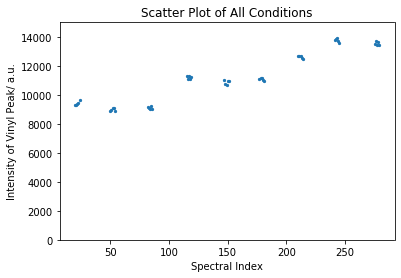

In [25]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [26]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [27]:
# Inspect df_.
df_

,Condition,99.878393,104.389608,108.898643,113.403376,117.905935,122.406320,126.902413,131.394219,135.888098,...,2470.539441,2473.703926,2476.867182,2480.027591,2483.188393,2486.347969,2489.504701,2492.661827,2495.816112,2498.965943
20,1,8101.0,9226.0,9400.0,9189.0,8660.0,7867.0,7065.0,6705.0,6234.0,...,278.0,246.0,292.0,254.0,269.0,282.0,233.0,285.0,265.0,198.0
21,1,8381.0,9227.0,9647.0,9176.0,8810.0,7525.0,6947.0,6688.0,6157.0,...,301.0,206.0,269.0,251.0,282.0,235.0,336.0,265.0,331.0,186.0
22,1,8269.0,9511.0,9552.0,9245.0,8676.0,7626.0,7193.0,6748.0,6254.0,...,241.0,276.0,259.0,192.0,309.0,237.0,266.0,233.0,328.0,227.0
23,1,8228.0,9425.0,9458.0,9156.0,8589.0,7834.0,7342.0,6552.0,6243.0,...,281.0,223.0,220.0,153.0,228.0,203.0,283.0,262.0,244.0,215.0
24,1,8013.0,9236.0,9925.0,9190.0,8521.0,7757.0,7228.0,6641.0,6151.0,...,275.0,238.0,202.0,270.0,223.0,258.0,243.0,301.0,299.0,230.0
50,2,8161.0,9175.0,9362.0,9160.0,8360.0,7561.0,6926.0,6350.0,6102.0,...,179.0,238.0,203.0,204.0,223.0,212.0,195.0,220.0,227.0,176.0
51,2,8052.0,9302.0,9383.0,9153.0,8492.0,7587.0,6993.0,6609.0,5897.0,...,206.0,211.0,211.0,219.0,233.0,246.0,260.0,234.0,240.0,186.0
52,2,8131.0,9076.0,9427.0,9150.0,8291.0,7610.0,6951.0,6339.0,6070.0,...,212.0,221.0,228.0,178.0,150.0,187.0,202.0,209.0,239.0,184.0
53,2,8345.0,9196.0,9416.0,9064.0,8418.0,7440.0,6968.0,6442.0,6000.0,...,258.0,170.0,184.0,184.0,178.0,243.0,241.0,185.0,257.0,191.0
54,2,8196.0,9263.0,9555.0,9153.0,8528.0,7620.0,7040.0,6222.0,6087.0,...,183.0,226.0,169.0,171.0,214.0,232.0,236.0,192.0,211.0,187.0


In [28]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.877942']].groupby('Condition').describe()

1629.877942                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
1                 5.0  10187.6   69.844828  10105.0  10160.0  10168.0   
2                 5.0   9663.4  111.648108   9496.0   9655.0   9671.0   
3                 5.0   9761.8   50.206573   9694.0   9725.0   9782.0   
4                 5.0  11919.8  105.788468  11744.0  11898.0  11970.0   
5                 5.0  11654.0  239.277036  11415.0  11426.0  11660.0   
6                 5.0  11758.2   64.099142  11701.0  11707.0  11746.0   
7                 5.0  13519.2  120.508091  13345.0  13448.0  13561.0   
8                 5.0  14493.0  150.248128  14339.0  14426.0  14433.0   
9                 5.0  13897.0   52.706736  13822.0  13872.0  13911.0   

                             
               75%      max  
Condition                    
1          10213.0  10292.0  
2           9686.0   9809.0  
3           9795.0   9813.0  
4          11993.0  11994.0  
5          11802.0  11967.0  
6          11779.0  11858.0  
7          13611.0  13631.0  
8          14536.0  14731.0  
9          13918.0  13962.0

In [29]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201008 High Throughput Experiment Conditions 1 to 9\Online Raman\df_t0_repeat.csv')